**1. Eksplorasi Dataset**

In [7]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
url = '/content/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

**Insight :**

Dataset ini menampilkan faktor-faktor kesehatan yang mempengaruhi kejadian kematian akibat gagal jantung, seperti usia, diabetes, dan fraksi ejeksi.

In [8]:
# Mengetahui informasi dasar tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


**Insight :**

Dataset ini terdiri dari 299 entri tanpa nilai yang hilang, dengan 13 kolom yang berisi data kesehatan pasien dalam format numerik

In [9]:
# Deskripsi statistik dari dataset
print(data.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

**Insight :**

Deskripsi statistik menunjukkan variasi yang signifikan dalam parameter kesehatan pasien, seperti fraksi ejeksi dan kadar kreatinin, yang mungkin berdampak pada hasil kesehatan.

In [10]:
# Memeriksa nilai yang hilang
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Insight :**


Dataset ini tidak memiliki nilai yang hilang, sehingga siap untuk analisis lebih lanjut tanpa perlu penanganan data yang hilang.

**2. Visualisasi Data**

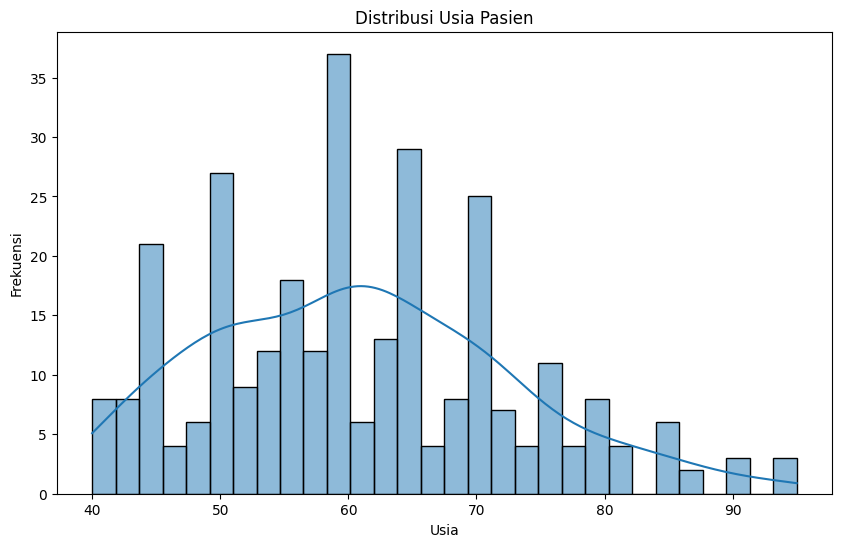

In [11]:
# Visualisasi distribusi usia pasien
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribusi Usia Pasien')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

**Insight :**

Distribusi usia pasien menunjukkan bahwa sebagian besar pasien berusia antara 50 hingga 70 tahun, dengan puncak frekuensi di sekitar usia 60 tahun.

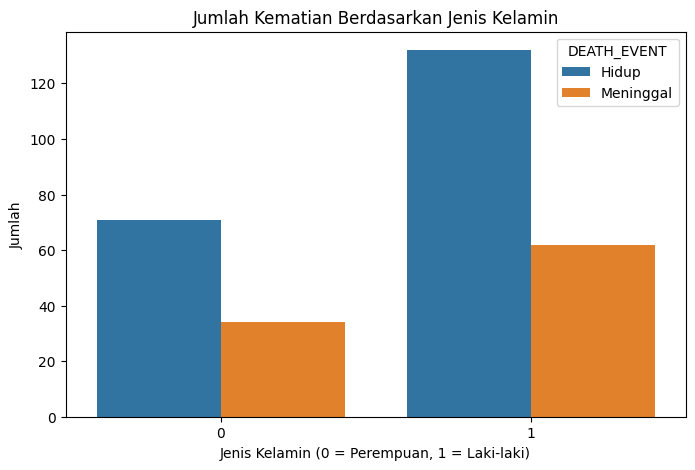

In [12]:
# Visualisasi jumlah kematian berdasarkan jenis kelamin
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='DEATH_EVENT', data=data)
plt.title('Jumlah Kematian Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Jumlah')
plt.legend(title='DEATH_EVENT', labels=['Hidup', 'Meninggal'])
plt.show()

**Insight :**

Jumlah kematian lebih tinggi pada laki-laki dibandingkan perempuan, menunjukkan adanya perbedaan risiko kematian berdasarkan jenis kelamin.

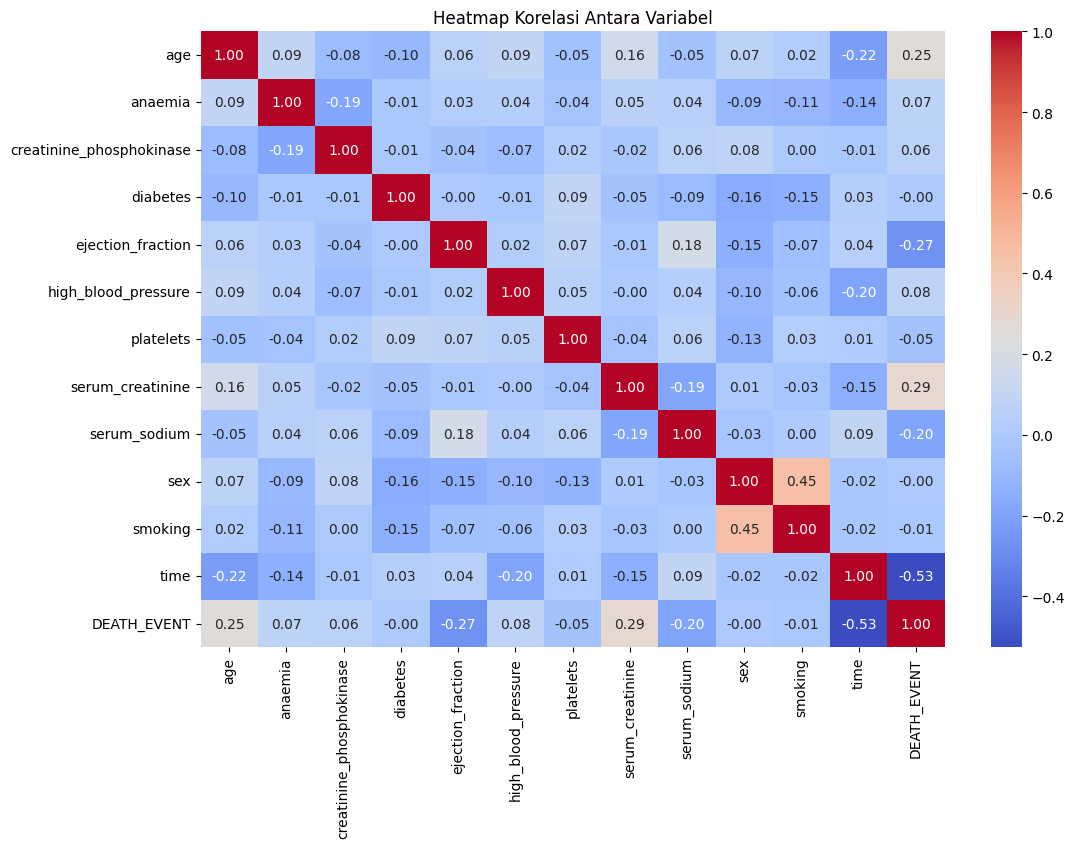

In [13]:
# Visualisasi heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Antara Variabel')
plt.show()

**Insight :**

Heatmap menunjukkan bahwa variabel time dan ejection_fraction memiliki korelasi negatif yang signifikan dengan kejadian kematian, sementara serum_creatinine menunjukkan korelasi positif yang cukup kuat.

**3. Pipeline**

--- Logistic Regression ---
Akurasi: 0.8000
Confusion Matrix:
[[34  1]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

--- Decision Tree ---
Akurasi: 0.6333
Confusion Matrix:
[[26  9]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70        35
           1       0.57      0.48      0.52        25

    accuracy                           0.63        60
   macro avg       0.62      0.61      0.61        60
weighted avg       0.63      0.63      0.63        60

--- k-NN ---
Akurasi: 0.6833
Confusion Matrix:
[[34  1]
 [18  7]]
Classification Report:
              precision    recall  f1-score   support



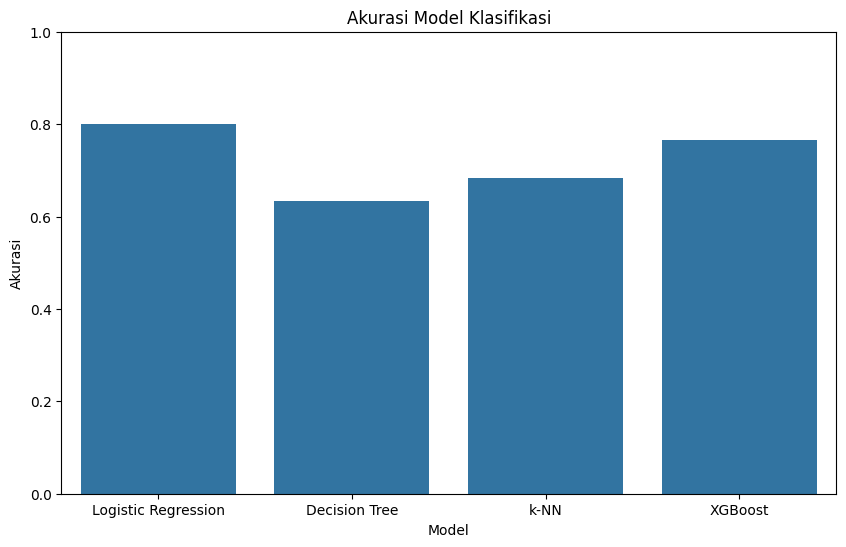

In [14]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Memisahkan fitur dan target
X = data.drop('DEATH_EVENT', axis=1)  # Fitur
y = data['DEATH_EVENT']  # Target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Daftar model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'k-NN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Menyimpan hasil akurasi
results = {}

# Loop untuk melatih dan menguji setiap model
for name, model in models.items():
    # Membuat pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalisasi data
        ('classifier', model)  # Model klasifikasi
    ])

    # Melatih model
    pipeline.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = pipeline.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    # Menampilkan hasil klasifikasi
    print(f'--- {name} ---')
    print(f'Akurasi: {accuracy:.4f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

# Visualisasi hasil akurasi
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Akurasi Model Klasifikasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

**Insight ;**

Model XGBoost menunjukkan akurasi terbaik sebesar 76.67%, mengungguli model lain seperti Logistic Regression, Decision Tree, dan k-NN dalam klasifikasi kejadian kematian.

**4. Hyperparameter Tuning**

--- Logistic Regression ---
Best Parameters: {'classifier__C': 0.01, 'classifier__solver': 'liblinear'}
Akurasi: 0.8000
Classification Report:
{'0': {'precision': 0.7555555555555555, 'recall': 0.9714285714285714, 'f1-score': 0.85, 'support': 35.0}, '1': {'precision': 0.9333333333333333, 'recall': 0.56, 'f1-score': 0.7, 'support': 25.0}, 'accuracy': 0.8, 'macro avg': {'precision': 0.8444444444444444, 'recall': 0.7657142857142858, 'f1-score': 0.7749999999999999, 'support': 60.0}, 'weighted avg': {'precision': 0.8296296296296295, 'recall': 0.8, 'f1-score': 0.7875, 'support': 60.0}}

--------------------------------------------------

--- Decision Tree ---
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5}
Akurasi: 0.6167
Classification Report:
{'0': {'precision': 0.6428571428571429, 'recall': 0.7714285714285715, 'f1-score': 0.7012987012987013, 'support': 35.0}, '1': {'precision': 0.5555555555555556, 'recall': 0.4, 'f1-score': 0.46511627906976744, 'support

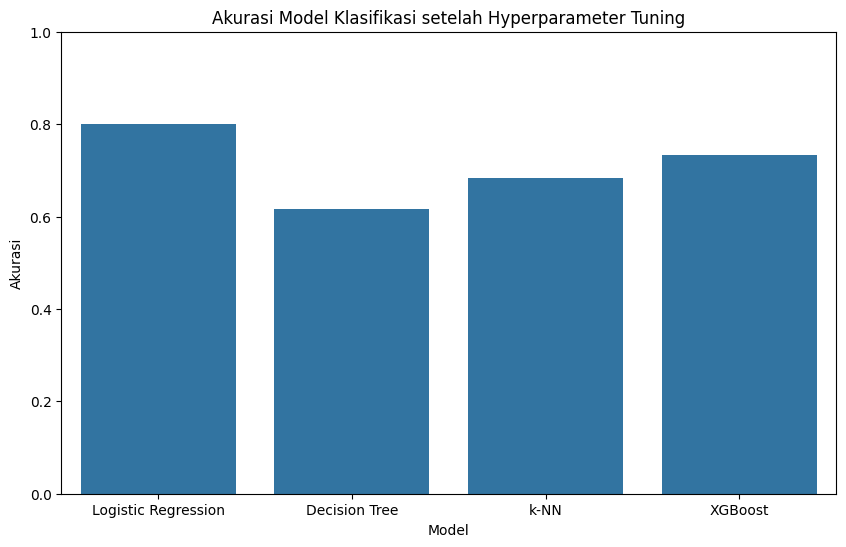

In [15]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Daftar model dan parameter yang akan di-tune
models_params = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'k-NN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__max_depth': [3, 5, 7],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__n_estimators': [50, 100, 150]
        }
    }
}

# Menyimpan hasil tuning
results = {}

# Loop untuk melatih dan menguji setiap model dengan hyperparameter tuning
for name, model_info in models_params.items():
    # Membuat pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Normalisasi data
        ('classifier', model_info['model'])  # Model klasifikasi
    ])

    # GridSearchCV untuk hyperparameter tuning
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Memprediksi data uji
    y_pred = grid_search.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy,
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

# Menampilkan hasil tuning
for name, result in results.items():
    print(f'--- {name} ---')
    print(f'Best Parameters: {result["best_params"]}')
    print(f'Akurasi: {result["accuracy"]:.4f}')
    print('Classification Report:')
    print(result['classification_report'])
    print('\n' + '-'*50 + '\n')

# Visualisasi hasil akurasi
model_names = list(results.keys())
accuracies = [result['accuracy'] for result in results.values()]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Akurasi Model Klasifikasi setelah Hyperparameter Tuning')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()

**Insight :**

Setelah tuning hyperparameter, Logistic Regression tetap menjadi model dengan akurasi tertinggi (80%), sementara XGBoost menunjukkan peningkatan performa yang signifikan dengan akurasi 73.33%.